# Liquor Licenses

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shapely
import geojson
from shapely.geometry import shape, Point


In [9]:


license_data = pd.read_csv("liq license data.csv")
coords = pd.read_excel("liquor_licenses_converted.xlsx")
license_data['long'] = coords['to Longitude']
license_data['lat'] = coords['to Latitude']



,license_num,historicallicensenum,status,license_type,issued,expires,business_name,dba_name,comments,location_comments,...,applicant,manager,day_phone,evening_phone,address,city,state,zip,gpsx,gpsy
0,LB-485386,NaN,Active,Retail Malt Wine,NaN,NaN,Dorchester Market LLC,Dorchester Market,NaN,Accessory retail sales of wine & malt beverage...,...,Dorchester Market LLC,Peter McGee,(617)238-7406,NaN,951- Dorchester AV,Dorchester,MA,02125,775975.718316,2.941310e+06
1,LB-480058,NaN,Active,CV7 Malt Wine,2022-11-03,2022-12-31,Foundation Kitchen LLC,Foundation Kitchen,NaN,"Approximately 5,723 rentable square feet consi...",...,Foundation Kitchen LLC,Henry Patterson,(617)718-0188,NaN,32- Cambridge ST,Charlestown,MA,02129,771165.251994,2.965090e+06
2,LB-489605,NaN,Active,CV7ALN - Neighborhood Restricted,2022-11-01,2022-12-31,"Rai Family Enterprises, LLC",Comfort Kitchen,NaN,In one large room on ground floor with dining ...,...,"Rai Family Enterprises, LLC",Biplaw Kirat Rai,(617)332-2094,NaN,611- Columbia RD,Dorchester,MA,02125,774071.645917,2.941017e+06
3,LB-489600,NaN,Active,Retail Malt Wine,2022-10-20,2023-12-31,Peabody EMarket Inc,E Market,NaN,"On one floor consisting of 1,708SF. Retail sal...",...,Peabody EMarket Inc.,Emad Hennawy,NaN,NaN,4- Park Pz,Boston,MA,02116,773182.442317,2.953694e+06
4,LB-481088,NaN,Active,CV7ALN - Neighborhood Restricted,2022-09-29,2022-12-31,Yak Thai Inc.,Thonglor,NaN,"1,000SF: in one room on first floor (seating f...",...,Yak Thai Inc.,Piyapong Wongla,(781)472-0835,NaN,559- Washington ST,Brighton,MA,02135,747073.290888,2.952562e+06


In [16]:
with open('City_Council_Districts_View.geojson') as f:
    gj = geojson.load(f)

district4 = shape(gj['features'][6]['geometry'])
df4LicenseDataset = license_data[license_data.apply(lambda x: Point(x.long,x.lat).within(district4), axis=1)] # district 4 only

districtLicensesDict = {}
for i in range(len(gj['features'])):
    district = gj['features'][i]['properties']['DISTRICT']
   
    boundaries = shape(gj['features'][i]['geometry'])
    num_licenses = len(license_data[license_data.apply(lambda x: Point(x.long,x.lat).within(boundaries), axis=1)])
    districtLicensesDict[district] = num_licenses

districtLicensesDict
    

{1: 215, 2: 507, 7: 56, 8: 194, 3: 84, 6: 71, 4: 34, 9: 101, 5: 50}

In [21]:

license_data['district'] = license_data.apply(lambda x: 0 if not Point(x.long,x.lat).within(district4) else 4, axis=1)
for i in range(len(gj['features'])):
    district = gj['features'][i]['properties']['DISTRICT']
    boundaries = shape(gj['features'][i]['geometry'])
    license_data['district'] = license_data.apply(lambda x: district if Point(x.long,x.lat).within(boundaries) else x.district, axis=1)


license_data['district'].value_counts()

2    507
1    215
8    194
0    136
9    101
3     84
6     71
7     56
5     50
4     34
Name: district, dtype: int64

In [27]:
openFoodLicenses = pd.read_csv("OpenFoodLicenses.csv")


openFoodLicenses['district'] = openFoodLicenses.apply(lambda x: 0 if not Point(x.Longitude,x.Latitude).within(district4) else 4, axis=1)
for i in range(len(gj['features'])):
    district = gj['features'][i]['properties']['DISTRICT']
    boundaries = shape(gj['features'][i]['geometry'])
    openFoodLicenses['district'] = openFoodLicenses.apply(lambda x: district if Point(x.Longitude,x.Latitude).within(boundaries) else x.district, axis=1)



openFoodLicenses['district'].value_counts()


districtFoodLicensesDict = {}
for i in range(len(gj['features'])):
    district = gj['features'][i]['properties']['DISTRICT']
    num_licenses = len(openFoodLicenses[openFoodLicenses['district'] == district])
    districtFoodLicensesDict[district] = num_licenses

districtFoodLicensesDict


{1: 210, 2: 673, 7: 101, 8: 339, 3: 117, 6: 129, 4: 62, 9: 221, 5: 83}

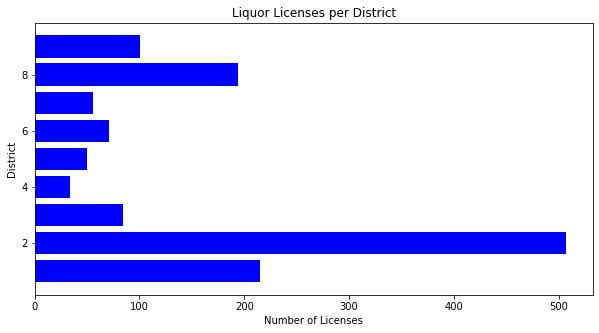

In [34]:
# horizontal bar chart of liquor licenses per district
plt.figure(figsize=(10,5))
plt.barh(list(districtLicensesDict.keys()), districtLicensesDict.values(), color='blue')
plt.title('Liquor Licenses per District')
plt.xlabel('Number of Licenses')
plt.ylabel('District')
plt.show()


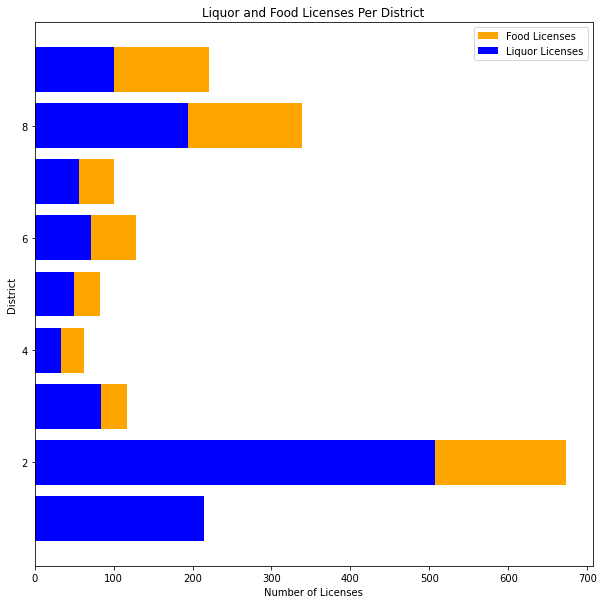

In [29]:
plt.figure(figsize=(10,10))
plt.barh(list(districtFoodLicensesDict.keys()), list(districtFoodLicensesDict.values()), color='orange', label='Food Licenses')
plt.barh(list(districtLicensesDict.keys()), list(districtLicensesDict.values()), color='blue', label='Liquor Licenses')

plt.legend()
plt.title('Liquor and Food Licenses Per District')
plt.xlabel('Number of Licenses')
plt.ylabel('District')
plt.show()



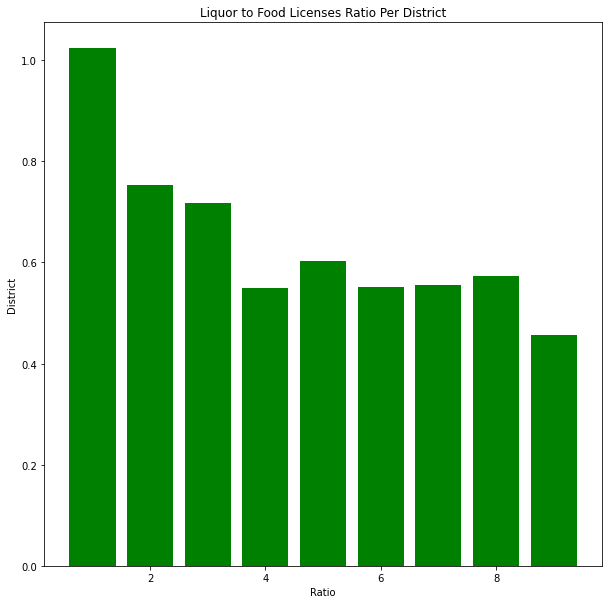

In [32]:

# plot distrubution of liquor licenses to food licenses ratio per district
ratioDict = {}
for i in range(len(gj['features'])):
    district = gj['features'][i]['properties']['DISTRICT']
    ratio = districtLicensesDict[district] / districtFoodLicensesDict[district]
    ratioDict[district] = ratio

# use a vertical bar plot

plt.figure(figsize=(10,10))
plt.bar(list(ratioDict.keys()), list(ratioDict.values()), color='green')
plt.title('Liquor to Food Licenses Ratio Per District')
plt.xlabel('Ratio')
plt.ylabel('District')
plt.show()


In [35]:
# show district 4 liquor licenses on a map
import folium
from folium.plugins import MarkerCluster

boston = [42.3601, -71.0589]
m = folium.Map(location=boston, zoom_start=11)

# add a marker for liquor licenses in district 4
for i in range(len(df4LicenseDataset)):
    folium.Marker([df4LicenseDataset.iloc[i]['lat'], df4LicenseDataset.iloc[i]['long']]).add_to(m)

m

